In [39]:
import pandas as pd
from decimal import Decimal
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import PolynomialCountSketch, RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler


# Question 1A)

df = pd.read_csv('diabetes_01_health_indicators.csv') #Getting data from csv


has_nulls = df.isnull().values.any()
print(has_nulls) # Checking if the dataset has any null values 
                 # The result is false so there are no null values in the data


    

False


In [40]:
# Question 1 B)
print(f"Count of each class are : \n{df['Diabetes_binary'].value_counts()}")


Count of each class are : 
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


<BarContainer object of 2 artists>

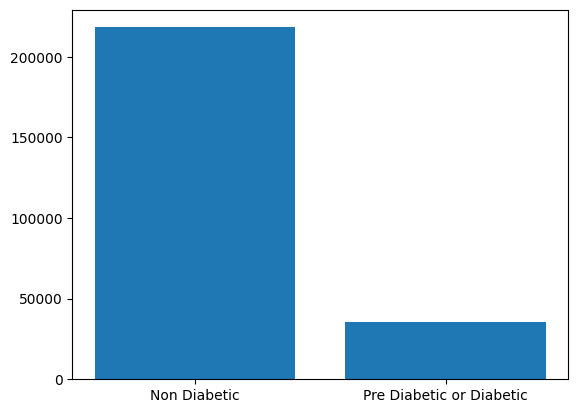

In [41]:
#Question 1 C)

categories = ['Non Diabetic', "Pre Diabetic or Diabetic"]
values = [218334, 35346]

plt.bar(categories, values)

In [42]:
# Question 1 D)
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
AnyHealthcare                0.016255  0.038425  0.042230   0.11

<Axes: >

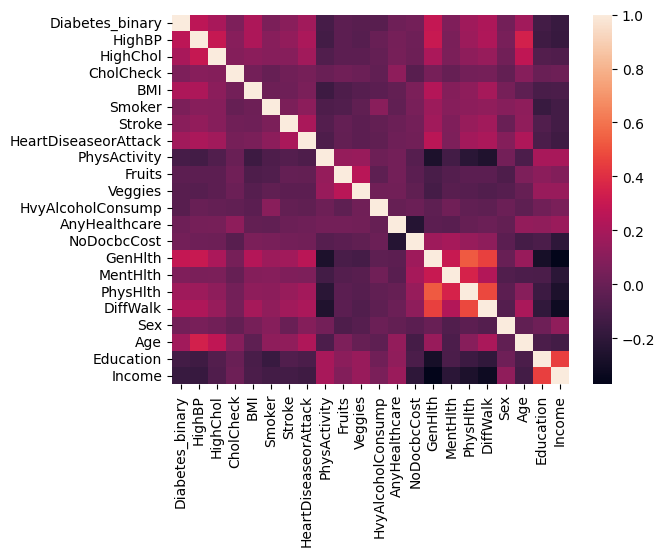

In [43]:
#Question 1 E)
corr_matrix = df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix)

In [44]:
# Data Processing
features = df.drop('Diabetes_binary', axis=1)  # Features
target = df['Diabetes_binary'] 

feature_train, feature_test, output_train, output_test = train_test_split(features, target, test_size=0.2, random_state=44)

In [45]:
#Question 2A)

model = LogisticRegression(max_iter=200)
model.fit(feature_train, output_train)

output_pred = model.predict(feature_test)

print("The accuracy of the Logistic regression model:", accuracy_score(output_test, output_pred))
print("The confusion matrix of the Logistic regression model is\n", confusion_matrix(output_test, output_pred))
print("The classification report of the Logistic regression model is\n", classification_report(output_test, output_pred))

The accuracy of the Logistic regression model: 0.8629178492589089
The confusion matrix of the Logistic regression model is
 [[42772   938]
 [ 6017  1009]]
The classification report of the Logistic regression model is
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43710
         1.0       0.52      0.14      0.22      7026

    accuracy                           0.86     50736
   macro avg       0.70      0.56      0.57     50736
weighted avg       0.83      0.86      0.83     50736



/Users/dipeshpaneru/Documents/UniveristyWork/Fundamentals of Data Science/Assignment 2/AnalysisOfMultipleModels/fresh_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#Question 2B)

# l1 lasso regularization

model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(feature_train, output_train)

output_pred = model.predict(feature_test)

print("The accuracy of the Logistic regression model:", accuracy_score(output_test, output_pred))
print("The confusion matrix of the Logistic regression model is\n", confusion_matrix(output_test, output_pred))
print("The classification report of the Logistic regression model is\n", classification_report(output_test, output_pred))

The accuracy of the Logistic regression model: 0.8635485651214128
The confusion matrix of the Logistic regression model is
 [[42743   967]
 [ 5956  1070]]
The classification report of the Logistic regression model is
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43710
         1.0       0.53      0.15      0.24      7026

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



In [47]:
#Question 2C)

# l2 ridge regularization

model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(feature_train, output_train)

output_pred = model.predict(feature_test)

print("The accuracy of the Logistic regression model:", accuracy_score(output_test, output_pred))
print("The confusion matrix of the Logistic regression model is\n", confusion_matrix(output_test, output_pred))
print("The classification report of the Logistic regression model is\n", classification_report(output_test, output_pred))

The accuracy of the Logistic regression model: 0.8635485651214128
The confusion matrix of the Logistic regression model is
 [[42744   966]
 [ 5957  1069]]
The classification report of the Logistic regression model is
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43710
         1.0       0.53      0.15      0.24      7026

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



In [ ]:
#Question 3A)

model = LinearSVC(max_iter=1000)
model.fit(feature_train, output_train)

output_pred = model.predict(feature_test)

print("The accuracy of the SVM model:", accuracy_score(output_test, output_pred))
print("The confusion matrix of the SVM model is\n", confusion_matrix(output_test, output_pred))
print("The classification report of the SVM model is\n", classification_report(output_test, output_pred))



The accuracy of the Logistic regression model: 0.8645340586565752
The confusion matrix of the Logistic regression model is
 [[43369   341]
 [ 6532   494]]
The classification report of the Logistic regression model is
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43710
         1.0       0.59      0.07      0.13      7026

    accuracy                           0.86     50736
   macro avg       0.73      0.53      0.53     50736
weighted avg       0.83      0.86      0.82     50736



In [49]:
#Question 3B)

# model = SVC(kernel='poly', degree=2, coef0=1, C=1)
# model.fit(feature_train, output_train)

# output_pred = model.predict(feature_test)



In [ ]:
# Using SVC class above was taking a very long time, so we are approximating 
# polynomial kernel using PolynomialCountSketch and SGDClassifier 

scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)

poly = PolynomialCountSketch(degree=2) 
feature_train_poly = poly.fit_transform(feature_train_scaled)
feature_test_poly = poly.transform(feature_test_scaled)

model = LinearSVC(max_iter=1000, dual=False, random_state=42)
model.fit(feature_train_poly, output_train)

output_pred = model.predict(feature_test_poly)


print("The accuracy of the SVM model:", accuracy_score(output_test, output_pred))
print("The confusion matrix of the SVM model is\n", confusion_matrix(output_test, output_pred))
print("The classification report of the SVM model is\n", classification_report(output_test, output_pred))


The accuracy of the Logistic regression model: 0.8635091453800063
The confusion matrix of the Logistic regression model is
 [[43479   231]
 [ 6694   332]]
The classification report of the Logistic regression model is
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43710
         1.0       0.59      0.05      0.09      7026

    accuracy                           0.86     50736
   macro avg       0.73      0.52      0.51     50736
weighted avg       0.83      0.86      0.81     50736



In [ ]:
#Question 3C)

# Using SVC class was taking a very long time like with polynomial kernel, so we are approximating 
# polynomial kernel using RBFSampler and LinearSVC 

rbf_feature = RBFSampler(gamma=0.5, n_components=500, random_state=42)
feature_train_rbf = rbf_feature.fit_transform(feature_train_scaled)
feature_test_rbf = rbf_feature.transform(feature_test_scaled)

model = LinearSVC(max_iter=1000, dual=False, random_state=42)
model.fit(feature_train_rbf, output_train)

output_pred = model.predict(feature_test_rbf)
acc = accuracy_score(output_test, output_pred)


print("The accuracy of the SVM model:", accuracy_score(output_test, output_pred))
print("The confusion matrix of the SVM model is\n", confusion_matrix(output_test, output_pred))
print("The classification report of the SVM model is\n", classification_report(output_test, output_pred))


The accuracy of the Logistic regression model: 0.8615184484389783
The confusion matrix of the Logistic regression model is
 [[43710     0]
 [ 7026     0]]
The classification report of the Logistic regression model is
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     43710
         1.0       0.00      0.00      0.00      7026

    accuracy                           0.86     50736
   macro avg       0.43      0.50      0.46     50736
weighted avg       0.74      0.86      0.80     50736



/Users/dipeshpaneru/Documents/UniveristyWork/Fundamentals of Data Science/Assignment 2/AnalysisOfMultipleModels/fresh_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dipeshpaneru/Documents/UniveristyWork/Fundamentals of Data Science/Assignment 2/AnalysisOfMultipleModels/fresh_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dipeshpaneru/Documents/UniveristyWork/Fundamentals of Data Science/Assignment 2/AnalysisOfMultipleModels/fresh_env/lib/python3.9/site-packa